In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
#한글이 깨져서 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
#나눔고딕으로 폰트 지정
plt.rc('font', family='NanumGothic')

In [4]:
#데이터 불러오기
path = '/content/drive/MyDrive/Colab Notebooks/DAT/DAT_HW/사교육비조사.csv'
df = pd.read_csv(path,encoding='cp949')

In [5]:
df.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [7]:
df.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


In [8]:
#라벨만 추출
labels = df.columns
print(labels)

Index(['지역구분코드', '행정구역시도코드', '학교급구분코드', '방과후학교참여여부', '방과후학교참여시간수', 'EBS교재비',
       '사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수', '사교육비총비용', '총자녀수', '학생성적구분코드',
       '부_교육정도코드', '모_교육정도코드', '부모경제활동코드', '월평균가구소득코드', '진학희망고등학교유형코드'],
      dtype='object')


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [9]:
#학교급 구분 코드만 확인
df.loc[:]['학교급구분코드']

0        1
1        1
2        1
3        1
4        1
        ..
75780    4
75781    4
75782    4
75783    4
75784    4
Name: 학교급구분코드, Length: 75785, dtype: int64

In [10]:
#학교급구분코드가 3인 데이터만 남기기
df1 = df[df.loc[:]['학교급구분코드'] == 3]

In [11]:
df1
#총 30052개의 row가 남음

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


In [12]:
#인덱스를 새로 지정
df1 = df1.reset_index()
df1

,index,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
1,4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
2,4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
3,4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4,4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
30048,75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
30049,75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
30050,75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


In [13]:
#학교급 구분코드 column 삭제
df2 = df1.drop('학교급구분코드', axis = 1)

2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [14]:
df2 = df2.drop('지역구분코드', axis = 1)
df2 = df2.drop('행정구역시도코드', axis = 1)

In [15]:
df2

,index,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
1,4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
2,4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
3,4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4,4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
30048,75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
30049,75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
30050,75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [16]:
#방과후학교참여여부의 항목 값 확인
#항목이 2종류이므로 one-hot-encoding 가능
print('항목 종류',df2['방과후학교참여여부'].unique())
print('항목 개수', df2['방과후학교참여여부'].nunique())
print('항목별 개수')
print(df2['방과후학교참여여부'].value_counts())

항목 종류 [1 2]
항목 개수 2
항목별 개수
1    18498
2    11554
Name: 방과후학교참여여부, dtype: int64


In [17]:
ohe = OneHotEncoder().fit_transform(df2[['방과후학교참여여부']]) #2차원 배열이여야지만 mapping이 됨
AfterSchool = ohe.toarray()

In [18]:
AfterSchool_column = pd.DataFrame(AfterSchool,columns = ['방과후학교참여여부','no_use'])
AfterSchool_column = AfterSchool_column.astype('int')
AfterSchool_column

,방과후학교참여여부,no_use
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
30047,0,1
30048,0,1
30049,0,1
30050,0,1


In [19]:
df2['방과후학교참여여부'] = AfterSchool_column['방과후학교참여여부']
df2

,index,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
1,4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
2,4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
3,4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4,4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,75678,0,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
30048,75679,0,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
30049,75680,0,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
30050,75681,0,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [20]:
df3 = df2.drop('EBS교재비', axis = 1)

In [21]:
df3

,index,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,4920,1,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
1,4921,1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
2,4922,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
3,4923,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4,4924,1,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,75678,0,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
30048,75679,0,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
30049,75680,0,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
30050,75681,0,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

In [22]:
labels = list(df3['학생성적구분코드'].unique())
labels.sort()
labels

[1.0, 2.0, 3.0, 4.0, 5.0]

<Axes: xlabel='학생성적구분코드', ylabel='사교육비총비용'>

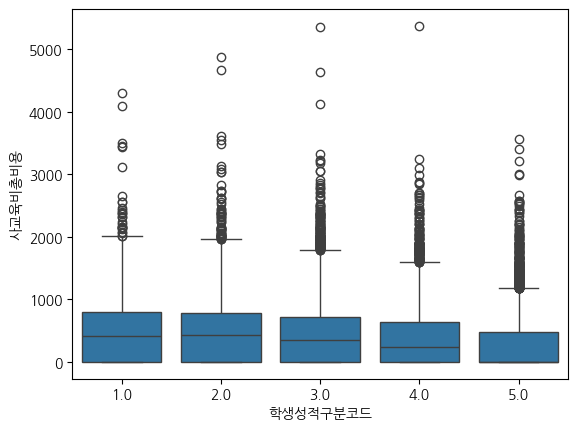

In [23]:
sns.boxplot(df3, x = '학생성적구분코드', y = '사교육비총비용', legend = False, order = labels)

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [24]:
df4 = df3[df3.loc[:]['학생성적구분코드'] != 3] #코드가 3인 row는 필요 없음
Grade_code = pd.get_dummies(df4['학생성적구분코드'])
Grade_code

,1.0,2.0,4.0,5.0
0,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
5,0,0,1,0
...,...,...,...,...
30047,0,0,0,1
30048,0,0,0,1
30049,0,0,0,1
30050,1,0,0,0


In [25]:
Grade_code['학생성적구분코드'] = Grade_code[1.0] + Grade_code[2.0] #코드가 1과 2인 row는 1, 4와5인 row는 0
df4 = df4.drop('학생성적구분코드', axis = 1)
df5 = pd.concat([df4, Grade_code['학생성적구분코드']], axis = 1)
df5

,index,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,학생성적구분코드
0,4920,1,0.333333,0.000000,0.000000,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1
2,4922,1,0.333333,0.000000,0.000000,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,0
3,4923,1,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,0
4,4924,1,0.333333,12.000000,12.000000,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,0
5,4925,1,0.333333,13.333333,13.333333,0.0,2518.166232,2,51.0,51.0,3.0,5,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,75678,0,0.000000,0.000000,0.000000,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0
30048,75679,0,0.000000,0.000000,0.000000,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0
30049,75680,0,0.000000,0.000000,0.000000,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0
30050,75681,0,0.000000,0.000000,0.000000,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,1


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: LabelEncoding은 항목들을 알파벳순으로 정렬하여 0부터 차례로 수를 할당해주는 것을 의미하고, One Hot Encoding은 0과 1의 dummy variables로 할당해준다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [26]:
#위에서 처리한 것 같음

2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요.

A: 다중공선성 문제는 feature들 간의 상관관계가 커서 생기는 문제이다. 즉, 여러 개의 feature들이 하나의 의미를 내포한다고 생각할 수 있다. 회귀 분석에서 서로 다른 feature들이 미치는 영향을 분석해야하는데, 같은 의미를 내포한 feature들이 많으면 분석의 결과가 해당 내용으로 치우칠 수 있다. 그러므로 상관관계 분석을 통해 feature들 중 유의미한 feature만 추출하여 분석에 사용해야 한다. one hot encoding을 통해 생성된 dummy variable은 기존의 feature와 동일한 의미를 내포한다. 그러므로 해당 feature들 사이에 상관관계가 강해서 이를 제거해야 더 유의미한 분석 결과를 얻을 수 있다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [27]:
df6 = df5[['사교육참여시간수','일반교과사교육시간수','예체능사교육시간수']]
df6

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
0,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0
4,12.000000,12.000000,0.0
5,13.333333,13.333333,0.0
...,...,...,...
30047,0.000000,0.000000,0.0
30048,0.000000,0.000000,0.0
30049,0.000000,0.000000,0.0
30050,0.000000,0.000000,0.0


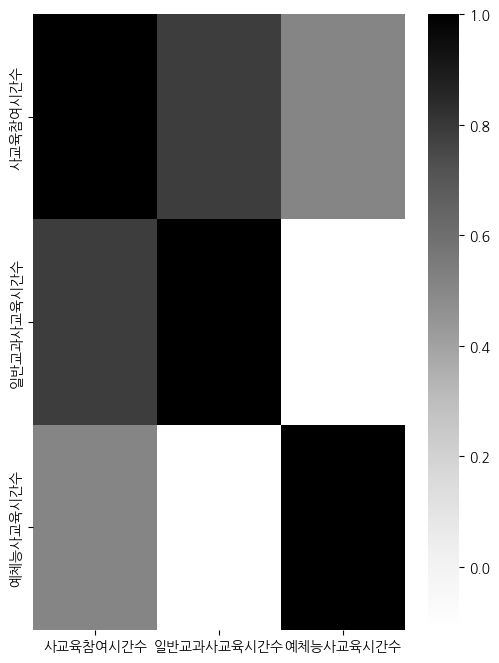

In [28]:
correlation = df6.corr()
plt.figure(figsize = (6,8))
sns.heatmap(correlation, cmap = 'Greys')
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [29]:
df5

,index,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,학생성적구분코드
0,4920,1,0.333333,0.000000,0.000000,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1
2,4922,1,0.333333,0.000000,0.000000,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,0
3,4923,1,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,0
4,4924,1,0.333333,12.000000,12.000000,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,0
5,4925,1,0.333333,13.333333,13.333333,0.0,2518.166232,2,51.0,51.0,3.0,5,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,75678,0,0.000000,0.000000,0.000000,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0
30048,75679,0,0.000000,0.000000,0.000000,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0
30049,75680,0,0.000000,0.000000,0.000000,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0
30050,75681,0,0.000000,0.000000,0.000000,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,1


In [30]:
df5.isna().any() #결측치 있는 column 찾기 - True면 결측치가 있고, False면 없음

index           False
방과후학교참여여부       False
방과후학교참여시간수      False
사교육참여시간수        False
일반교과사교육시간수      False
예체능사교육시간수       False
사교육비총비용         False
총자녀수            False
부_교육정도코드         True
모_교육정도코드         True
부모경제활동코드         True
월평균가구소득코드       False
진학희망고등학교유형코드     True
학생성적구분코드        False
dtype: bool

<Axes: >

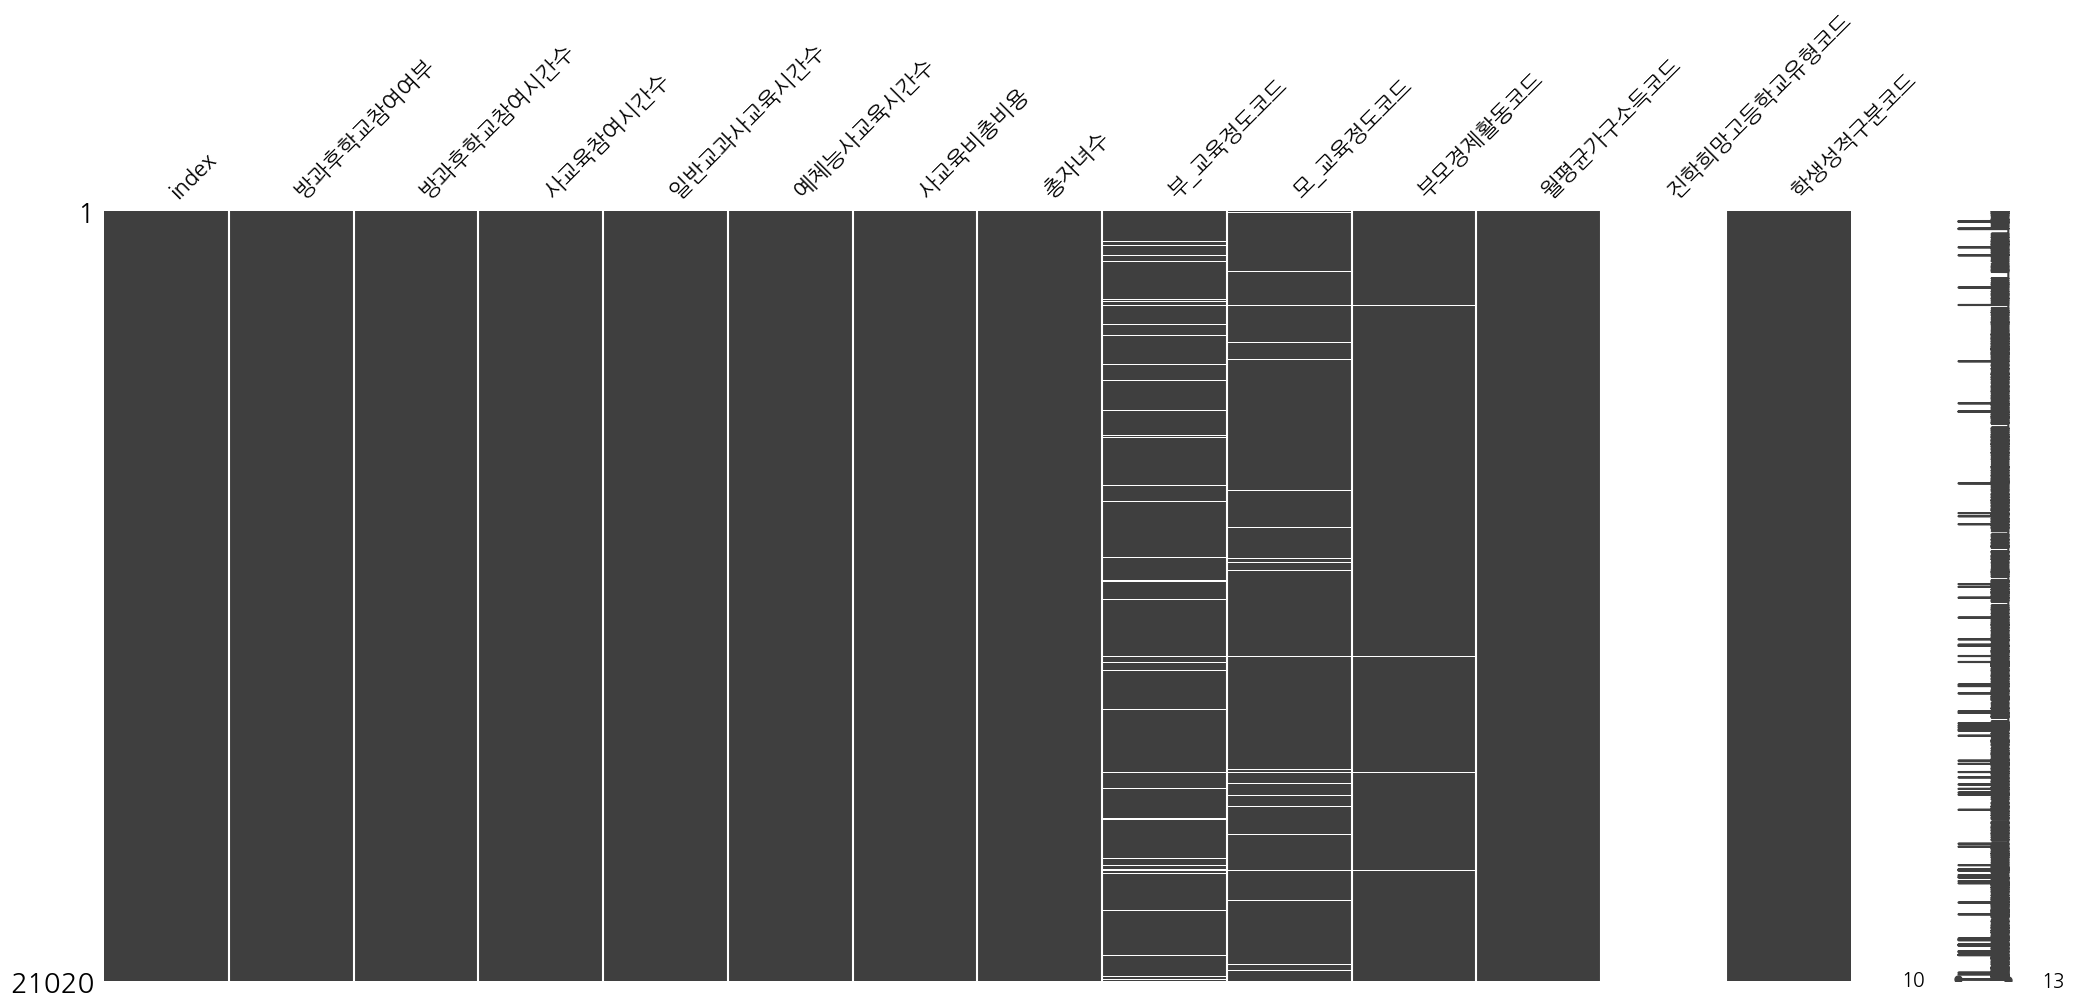

In [31]:
#결측치 시각화
msno.matrix(df5)

In [32]:
#고등학생들만 선택했으므로 진학희망고등학교가 없는것 같음 - 삭제
df6 = df5.drop('진학희망고등학교유형코드', axis = 1)

In [33]:
#결측치가 있으면 삭제
df6 = df6.dropna(subset=['부모경제활동코드','부_교육정도코드','모_교육정도코드'])

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [40]:
df

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.0,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.0,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75780,4,39,4,2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,4,1.0,51.0,51.0,3.0,4,NaN
75781,4,39,4,2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,4,5.0,11.0,NaN,4.0,1,NaN
75782,4,39,4,2,0.000000,0.0,1.000000,0.000000,1.0,166.403182,4,3.0,31.0,NaN,1.0,1,NaN
75783,4,39,4,2,0.000000,0.0,5.000000,0.000000,5.0,147.548803,2,2.0,51.0,31.0,3.0,3,NaN


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

<Axes: >

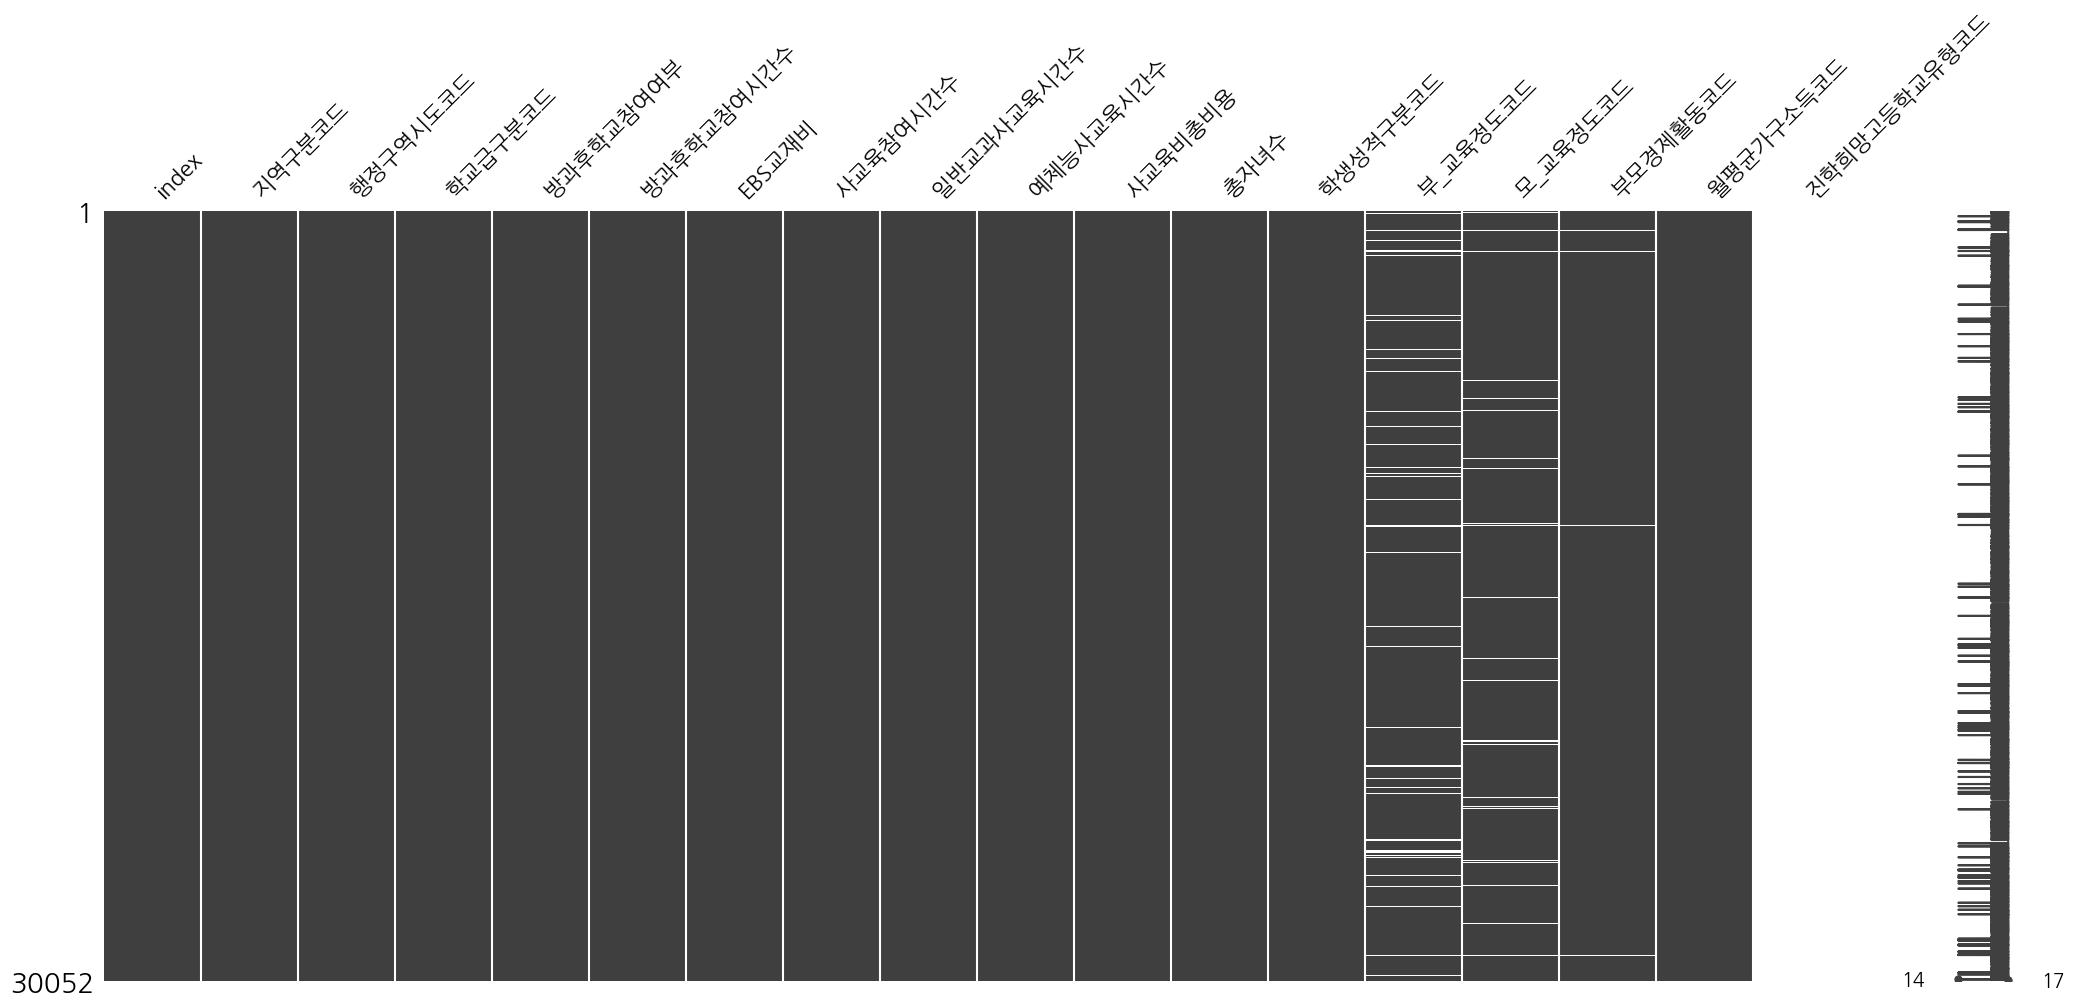

In [42]:
#전체 데이터에서 결측치가 있는지 보기
msno.matrix(df1)

In [43]:
df7 = df1.drop('진학희망고등학교유형코드',axis = 1)

In [44]:
df7 = df7.dropna(subset = ['부_교육정도코드','모_교육정도코드','부모경제활동코드'])

In [45]:
df7.isna().any()

index         False
지역구분코드        False
행정구역시도코드      False
학교급구분코드       False
방과후학교참여여부     False
방과후학교참여시간수    False
EBS교재비        False
사교육참여시간수      False
일반교과사교육시간수    False
예체능사교육시간수     False
사교육비총비용       False
총자녀수          False
학생성적구분코드      False
부_교육정도코드      False
모_교육정도코드      False
부모경제활동코드      False
월평균가구소득코드     False
dtype: bool

In [46]:
y = df7['사교육비총비용']
df7 = df7.drop('사교육비총비용', axis = 1)

In [47]:
#데이터 나누기
x_train, x_test,y_train, y_test = train_test_split(df7.iloc[:,:], y, random_state = 42)

In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20707 entries, 15211 to 25580
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       20707 non-null  int64  
 1   지역구분코드      20707 non-null  int64  
 2   행정구역시도코드    20707 non-null  int64  
 3   학교급구분코드     20707 non-null  int64  
 4   방과후학교참여여부   20707 non-null  int64  
 5   방과후학교참여시간수  20707 non-null  float64
 6   EBS교재비      20707 non-null  float64
 7   사교육참여시간수    20707 non-null  float64
 8   일반교과사교육시간수  20707 non-null  float64
 9   예체능사교육시간수   20707 non-null  float64
 10  총자녀수        20707 non-null  int64  
 11  학생성적구분코드    20707 non-null  float64
 12  부_교육정도코드    20707 non-null  float64
 13  모_교육정도코드    20707 non-null  float64
 14  부모경제활동코드    20707 non-null  float64
 15  월평균가구소득코드   20707 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 2.7 MB


In [49]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 20707 entries, 15211 to 25580
Series name: 사교육비총비용
Non-Null Count  Dtype  
--------------  -----  
20707 non-null  float64
dtypes: float64(1)
memory usage: 323.5 KB


In [50]:
#모델 생성과 훈련
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [51]:
reg.score(x_test,y_test)

0.6039675949003329

In [52]:
#model에서 weight들의 값
coefficient = reg.coef_
intercept = reg.intercept_
print('coefficient : ', coefficient)
print('--------------------------------------------------------------------')
print('intercept : ', intercept)

coefficient :  [ 3.99511924e-04 -2.89629100e+01 -2.83680514e+00  3.55271368e-15
  1.23086678e+01  4.96949078e-01  1.90519884e-01  3.17565375e+01
  2.75429541e+01  1.63163228e+00 -2.35571055e+01 -6.86927595e+00
  2.03743752e+00  1.63124593e+00 -1.32763219e+01  2.82476467e+01]
--------------------------------------------------------------------
intercept :  59.14749271376223


In [53]:
poly3_features = PolynomialFeatures(degree = 3)
x_poly3_train = poly3_features.fit_transform(x_train)

In [54]:
#Ridge를 이용해서 regression
ridge_reg = Ridge()

In [ ]:
param_grid = {'alpha' : list(range(1,10))}  #최고의 parameter 찾기

gs = GridSearchCV(ridge_reg, param_grid, cv = 10)
gs.fit(x_poly3_train, y_train) #3차식으로 하고싶었는데 너무 오래걸림,,,,,
#cv를 줄여서 다음에 기회에,,,,

In [ ]:
print('Best Parameter :', gs.best_params_)  #최고의 parameter

In [ ]:
best_ridge = Ridge(**gs.best_params_, solver = 'cholesky')
best_ridge.fit(x_poly3_train, y_train)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<Axes: ylabel='사교육비총비용'>

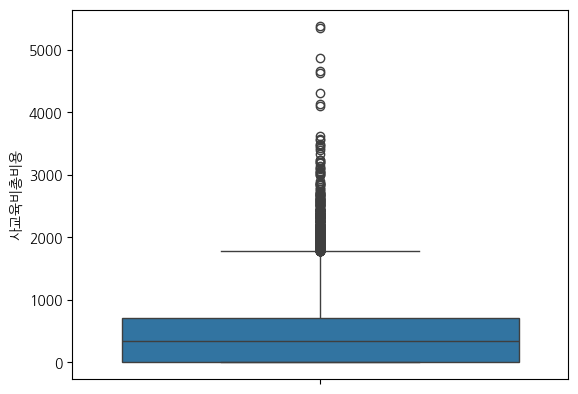

In [56]:
#사교육비총비용의 데이터 형태 살펴보기
sns.boxplot(y)

In [57]:
#5개의  범주로 나눌건데, 균등하게 5등분
bins = np.linspace(y.min(),y.max(),5)
print(bins)

[   0.        1343.5391145 2687.078229  4030.6173435 5374.156458 ]


In [58]:
#필요없는거 빼기
df8 = df1.drop('진학희망고등학교유형코드',axis = 1)
df8 = df8.dropna(subset = ['부_교육정도코드','모_교육정도코드','부모경제활동코드'])

In [59]:
#연속형 변수는 randomforest 불가 -> 이산화하기
df8['사교육비총비용'] = np.digitize(df8['사교육비총비용'],bins)

In [60]:
df8

,index,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드
0,4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,1,1,2.0,71.0,61.0,2.0,4
1,4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,1,2,3.0,51.0,51.0,3.0,6
2,4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,1,2,5.0,31.0,41.0,3.0,4
3,4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,1,2,5.0,51.0,51.0,3.0,1
4,4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2,2,4.0,71.0,62.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30046,75677,4,39,3,2,0.000000,19.684315,8.0,8.0,0.0,1,2,4.0,51.0,51.0,3.0,8
30047,75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,1,1,5.0,51.0,31.0,3.0,4
30048,75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,1,4,5.0,41.0,31.0,3.0,6
30049,75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,1,3,5.0,51.0,51.0,3.0,8


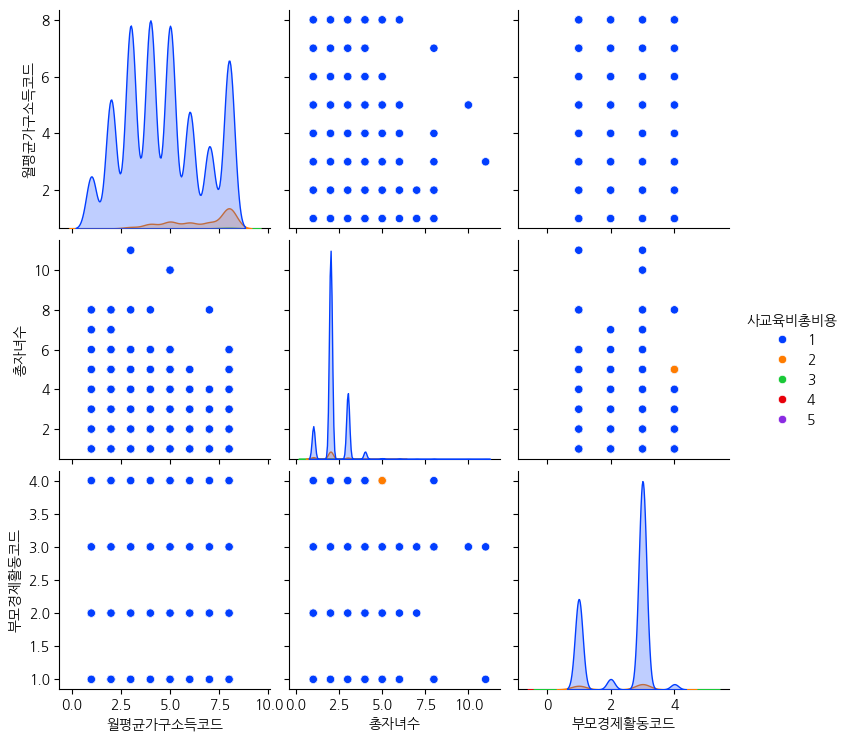

In [62]:
#pairplot을 통해 feature들간의 관계 알아보기
sns.pairplot(df8[['월평균가구소득코드','총자녀수','부모경제활동코드','사교육비총비용']], hue = '사교육비총비용', palette = 'bright')
plt.show()

In [63]:
y2 = df8['사교육비총비용']
df8 = df8.drop('사교육비총비용', axis = 1)

In [64]:
#데이터 나누기
x_train, x_test,y_train, y_test = train_test_split(df8.iloc[:,:], y2, random_state = 42)

In [65]:
x_train

,index,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드
15211,39750,3,31,3,2,0.000000,0.000000,0.0,0.0,0.0,2,4.0,31.0,51.0,3.0,4
23477,57968,3,38,3,2,0.000000,0.000000,16.0,8.0,8.0,3,5.0,31.0,31.0,1.0,3
25005,61449,4,26,3,2,0.000000,5.905295,0.0,0.0,0.0,1,3.0,34.0,31.0,2.0,1
7907,18259,2,22,3,2,0.000000,27.558041,20.0,20.0,0.0,2,3.0,51.0,51.0,3.0,7
25378,63193,4,31,3,2,0.000000,0.000000,8.0,0.0,8.0,3,4.0,31.0,31.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,57801,3,38,3,1,9.000000,3.936863,0.0,0.0,0.0,2,1.0,41.0,41.0,1.0,3
5744,13640,2,21,3,1,8.333333,22.205127,4.0,4.0,0.0,2,5.0,51.0,51.0,1.0,4
904,5824,1,11,3,1,2.666667,21.808607,6.0,6.0,0.0,1,2.0,51.0,72.0,3.0,8
17010,42879,3,32,3,1,1.333333,0.000000,7.0,7.0,0.0,2,1.0,52.0,52.0,3.0,8


In [66]:
y_train

15211    1
23477    1
25005    1
7907     2
25378    1
        ..
23310    1
5744     1
904      1
17010    1
25580    1
Name: 사교육비총비용, Length: 20707, dtype: int64

In [67]:
#모델 구축 및 fitting
rfc = RandomForestClassifier(n_estimators = 20, max_depth = 5, random_state = 42)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)

In [68]:
#모델 accuracy!
predict_rfc = rfc.predict(x_test)
print(accuracy_score(y_test,predict_rfc))

0.9501665942343909
